In [594]:
from IPython.display import Image
# 啟動互動式繪圖環境
%pylab inline
import pandas as pd
import datetime
import numpy as np
import random as rd
import math
from functools import partial
from numpy import *
from scipy.linalg import *
from scipy.cluster.vq import *
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


#Machine Learning 2015 Final Project

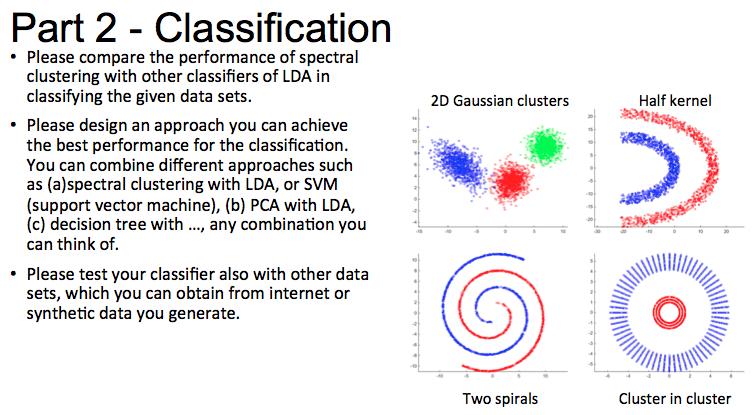

In [3]:
Image(filename='/Users/wy/Desktop/Part 2 - Classification.png') 

In [766]:
def gaussian_sim(v1, v2):
    sigma = 1
    '''
    Gaussian kernel similarity function
    '''
    return exp( (-norm(v1-v2)**2)/(2*(sigma**2)) )

def construct_W (vecs):
    '''
    建立 W matrix
    '''
    n = len(vecs)
    W = zeros((n, n))
    for i in xrange(n):
        for j in xrange(i,n):
            W[i,j] = W[j,i] = gaussian_sim(vecs[i], vecs[j])
    return W

def construct_kdMatrix(data,kd):
    '''
    建立降維後的矩陣
    '''
    W = construct_W (data)
    D = diag([reduce(lambda x,y:x+y, Wi) for Wi in W])
    L = D - W

    evals, evcts = eig(L,D)
    vals = dict (zip(evals, evcts.transpose()))
    keys = vals.keys()
    keys.sort()
    kdM = array ([vals[index] for index in keys[:kd]]).transpose()
    return kdM

def spectralClustering(data,k,kd):
    kdM = construct_kdMatrix(data,kd)
    centroids,idx = kMeans(kdM, k, maxIters = 100)
    return centroids,idx

def kMeans(X, K, maxIters = 100):
    
    N = len(X)
    init_SSE = inf
    
    for i in range(10):
        random_centroids = X[np.random.choice(np.arange(N), K), :]
        new_init_SSE = sum([ np.sum((np.tile(random_centroids[k],(N,1)) - X)*(np.tile(random_centroids[k],(N,1)) - X), axis=1) for k in range(K) ])
        if new_init_SSE < init_SSE:
            centroids = random_centroids
            init_SSE = new_init_SSE
            
    D = [ np.sum((np.tile(centroids[k],(N,1)) - X)*(np.tile(centroids[k],(N,1)) - X), axis=1) for k in range(K) ]
    C = np.argmin( np.dstack(tuple(D))[0] , axis=1 )
    centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    SSE = sum(D)
    
    i = 0
    threshold = 0.001
    while i < maxIters:
        D = [ np.sum((np.tile(centroids[k],(N,1)) - X)*(np.tile(centroids[k],(N,1)) - X), axis=1) for k in range(K) ]
        C = np.argmin( np.dstack(tuple(D))[0] , axis=1 )
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
        new_SSE = sum(D)
        if abs(new_SSE - SSE) < threshold:
            break
        SSE = new_SSE
        i += 1
    return np.array(centroids) , list(C)

In [693]:
# twospirals
trainData_twospirals = "/Users/wy/Desktop/MLfinalproject/data_txt/trainData_twospirals.txt"
testData_twospirals = "/Users/wy/Desktop/MLfinalproject/data_txt/testData_twospirals.txt"
verificationData_twospirals = "/Users/wy/Desktop/MLfinalproject/data_txt/verificationData_twospirals.txt"

# clusterincluster
trainData_clusterincluster = "/Users/wy/Desktop/MLfinalproject/data_txt/trainData_clusterincluster.txt"
testData_clusterincluster = "/Users/wy/Desktop/MLfinalproject/data_txt/testData_clusterincluster.txt"
verificationData_clusterincluster = "/Users/wy/Desktop/MLfinalproject/data_txt/verificationData_clusterincluster.txt"

# gaussianClusters2D
trainData_gaussianClusters2D = "/Users/wy/Desktop/MLfinalproject/data_txt/trainData_gaussianClusters2D.txt"
testData_gaussianClusters2D = "/Users/wy/Desktop/MLfinalproject/data_txt/testData_gaussianClusters2D.txt"
verificationData_gaussianClusters2D = "/Users/wy/Desktop/MLfinalproject/data_txt/verificationData_gaussianClusters2D.txt"

# halfkernel
trainData_halfkernel = "/Users/wy/Desktop/MLfinalproject/data_txt/trainData_halfkernel.txt"
testData_halfkernel = "/Users/wy/Desktop/MLfinalproject/data_txt/testData_halfkernel.txt"
verificationData_halfkernel = "/Users/wy/Desktop/MLfinalproject/data_txt/verificationData_halfkernel.txt"


In [739]:
def loaddata1(path):
    '''
    twospirals , clusterincluster , halfkernel
    '''
    with open(path, 'r') as f:
        read_data = f.readlines()
    x0 = []; y0 = []; x1 = []; y1 = [];
    for line in read_data:
        line = line.strip()
        line = line.split(',')
        if line[2] == '0':
            x0.append(float(line[0]))
            y0.append(float(line[1]))            
        elif line[2] == '1':
            x1.append(float(line[0]))
            y1.append(float(line[1]))
    x = x0+x1; y = y0+y1;
    dataset = np.array([[xi,yi]for xi,yi in zip(x,y)])
    label = [0]*len(x0) + [1]*len(x1)
    return x0,y0,x1,y1,dataset,label

def loaddata2(path):
    '''
    gaussianClusters2D
    '''
    x1 = []; y1 = []; x2 = []; y2 = []; x3 = []; y3 = [];   
    with open(path, 'r') as f:
        read_data = f.readlines()
    for line in read_data:
        line = line.strip()
        line = line.split(',')
        if line[2] == '1':
            x1.append(float(line[0]))
            y1.append(float(line[1]))            
        elif line[2] == '2':
            x2.append(float(line[0]))
            y2.append(float(line[1]))
        elif line[2] == '3':
            x3.append(float(line[0]))
            y3.append(float(line[1]))
    x = x1+x2+x3; y = y1+y2+y3;
    dataset = np.array([[xi,yi]for xi,yi in zip(x,y)])
    label = [1]*len(x1) + [2]*len(x2)+ [3]*len(x3)
    return x1,y1,x2,y2,x3,y3,dataset,label

### 分別把四種類型且train,test,verification的部分畫出來

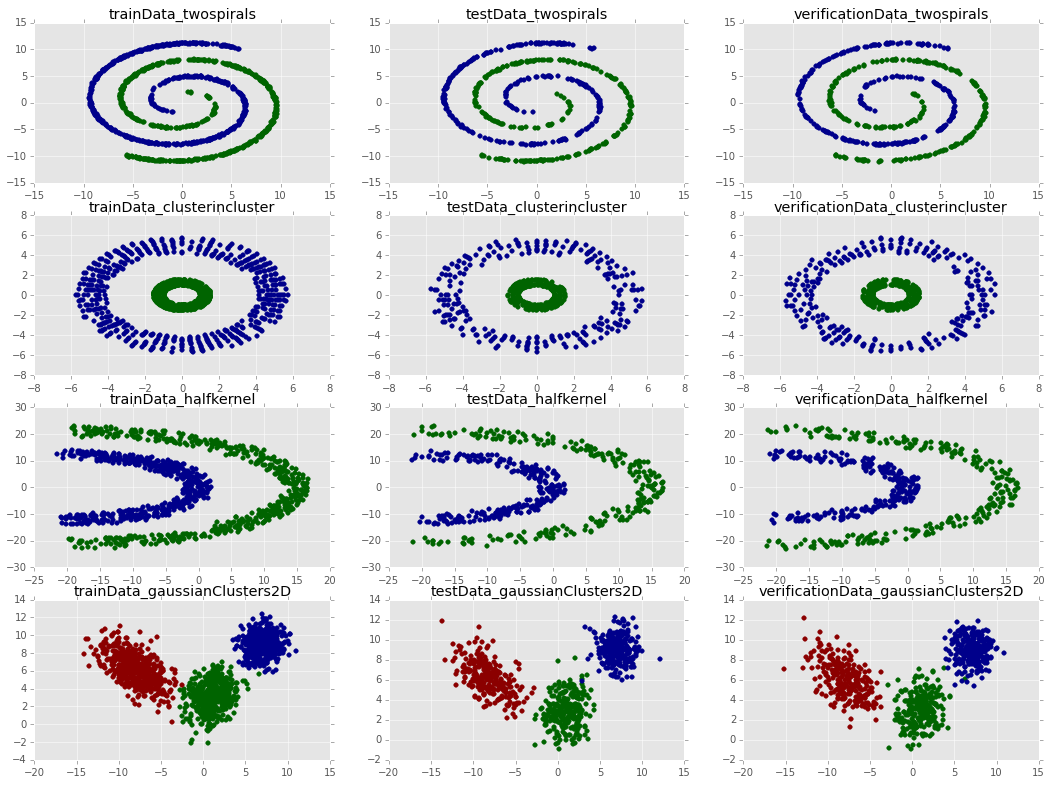

In [758]:
fig = plt.figure(figsize=(18, 27))
paths = [trainData_twospirals,testData_twospirals,verificationData_twospirals,
        trainData_clusterincluster,testData_clusterincluster,verificationData_clusterincluster,
        trainData_halfkernel,testData_halfkernel,verificationData_halfkernel,
        trainData_gaussianClusters2D,testData_gaussianClusters2D,verificationData_gaussianClusters2D
       ]
for index in range(len(paths)):
    if index < 9 :
        x0,y0,x1,y1,dataset,label = loaddata1(paths[index])
        ax = fig.add_subplot(8,3,index+1)
        ax.scatter(x0, y0, color="DarkGreen")
        ax.scatter(x1, y1, color="DarkBlue")
        name = paths[index].split('/')
        name = name[6].split('.')
        name = name[0]
        ax.set_title(str(name))
    else:
        x1,y1,x2,y2,x3,y3,dataset,label = loaddata2(paths[index])
        ax = fig.add_subplot(8,3,index+1)
        ax.scatter(x1, y1, color="DarkGreen")
        ax.scatter(x2, y2, color="DarkBlue")
        ax.scatter(x3, y3, color="DarkRed")
        name = paths[index].split('/')
        name = name[6].split('.')
        name = name[0]
        ax.set_title(str(name))

###Please compare the performance of spectral clustering with other classifiers of LDA
###in classifying the given data sets. 

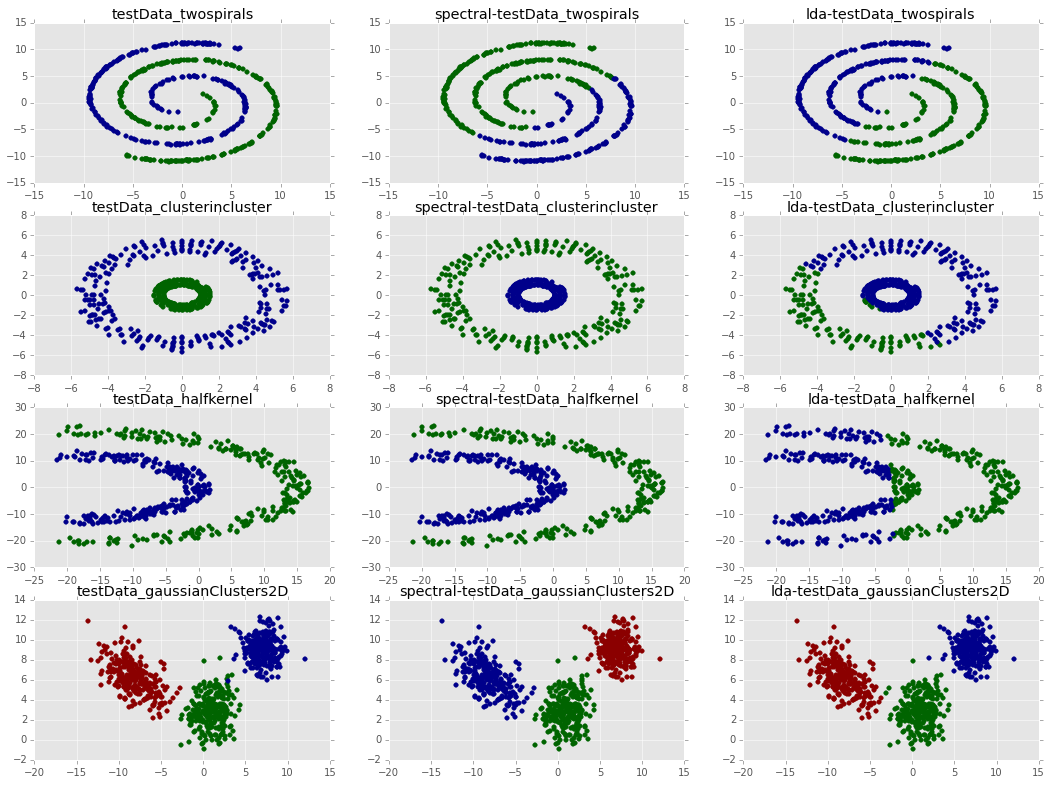

In [810]:
fig = plt.figure(figsize=(18, 27))
test_paths = [testData_twospirals,testData_clusterincluster,testData_halfkernel,testData_gaussianClusters2D]
train_paths = [trainData_twospirals,trainData_clusterincluster,trainData_halfkernel,trainData_gaussianClusters2D]
for index in range(len(train_paths)):
    name = test_paths[index].split('/')
    name = name[6].split('.')
    name = name[0]
    if  name != "testData_gaussianClusters2D":
        # 原本答案
        x0,y0,x1,y1,dataset,label = loaddata1(test_paths[index])
        ax = fig.add_subplot(8,3,(index*3)+1)
        ax.scatter(x0, y0, color="DarkGreen")
        ax.scatter(x1, y1, color="DarkBlue")
        ax.set_title(str(name))
        # spectralClustering
        centroids,pre_label = spectralClustering(dataset,k=2,kd=2)
        x0 = []; y0 = []; x1 = []; y1 = [];
        for data,t_label in zip(dataset,pre_label):  
            if t_label == 0:
                x0.append(data[0])
                y0.append(data[1])
            elif t_label == 1:
                x1.append(data[0])
                y1.append(data[1])         
        ax = fig.add_subplot(8,3,(index*3)+2)
        ax.scatter(x0, y0, color="DarkGreen")
        ax.scatter(x1, y1, color="DarkBlue")
        ax.set_title("spectral-"+str(name))
        # lda
        x0,y0,x1,y1,train_dataset,train_label = loaddata1(train_paths[index])
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(train_dataset, train_label)
        x0,y0,x1,y1,test_dataset,test_label = loaddata1(test_paths[index])
        pre_label = clf1.predict(test_dataset)
        x0 = []; y0 = []; x1 = []; y1 = [];
        for data,t_label in zip(test_dataset,pre_label):  
            if t_label == 0:
                x0.append(data[0])
                y0.append(data[1])
            elif t_label == 1:
                x1.append(data[0])
                y1.append(data[1])         
        ax = fig.add_subplot(8,3,(index*3)+3)
        ax.scatter(x0, y0, color="DarkGreen")
        ax.scatter(x1, y1, color="DarkBlue")
        ax.set_title("lda-"+str(name))
    else:
        # 原本答案
        x1,y1,x2,y2,x3,y3,dataset,label = loaddata2(paths[index])
        ax = fig.add_subplot(8,3,(index*3)+1)
        ax.scatter(x1, y1, color="DarkGreen")
        ax.scatter(x2, y2, color="DarkBlue")
        ax.scatter(x3, y3, color="DarkRed")
        ax.set_title(str(name))
        # spectralClustering
        centroids,pre_label = spectralClustering(dataset,k=3,kd=2)
        x1 = []; y1 = []; x2 = []; y2 = []; x3 = []; y3 = [];   
        for data,t_label in zip(dataset,pre_label):  
            if t_label == 0:
                x1.append(data[0])
                y1.append(data[1])            
            elif t_label == 1:
                x2.append(data[0])
                y2.append(data[1])
            elif t_label == 2:
                x3.append(data[0])
                y3.append(data[1])
        ax = fig.add_subplot(8,3,(index*3)+2)
        ax.scatter(x1, y1, color="DarkGreen")
        ax.scatter(x2, y2, color="DarkBlue")
        ax.scatter(x3, y3, color="DarkRed")
        ax.set_title("spectral-"+str(name))
        # lda
        x1,y1,x2,y2,x3,y3,train_dataset,train_label = loaddata2(train_paths[index])
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(train_dataset, train_label)
        x1,y1,x2,y2,x3,y3,test_dataset,test_label = loaddata2(test_paths[index])
        pre_label = clf1.predict(test_dataset)
        x1 = []; y1 = []; x2 = []; y2 = []; x3 = []; y3 = [];   
        for data,t_label in zip(test_dataset,pre_label):  
            if t_label == 1:
                x1.append(data[0])
                y1.append(data[1])            
            elif t_label == 2:
                x2.append(data[0])
                y2.append(data[1])
            elif t_label == 3:
                x3.append(data[0])
                y3.append(data[1])
        ax = fig.add_subplot(8,3,(index*3)+3)
        ax.scatter(x1, y1, color="DarkGreen")
        ax.scatter(x2, y2, color="DarkBlue")
        ax.scatter(x3, y3, color="DarkRed")
        ax.set_title("lda-"+str(name))

In [811]:
from sklearn.cluster import DBSCAN

# DBSCAN
### 因為twospirals分得不太好，因此採用DBSCAN試試看，並且調整兩個samples的最大距離，看看分群狀況，三種類型的dataset，train,test,verification，只有使用test，因為三種狀況差不多。

###eps :  
The maximum distance between two samples for them to be considered as in the same neighborhood.  
###min_samples :  
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

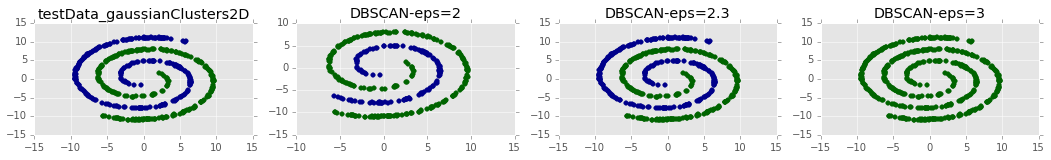

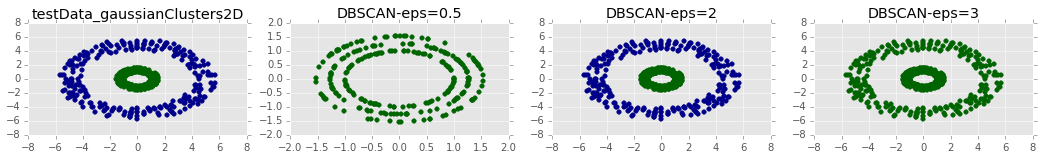

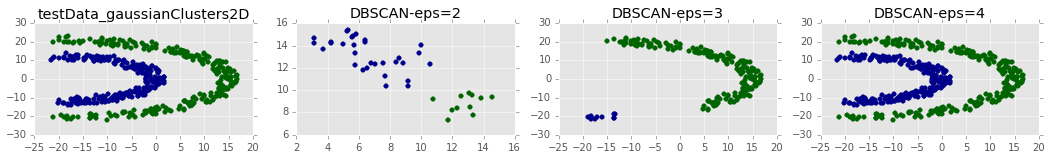

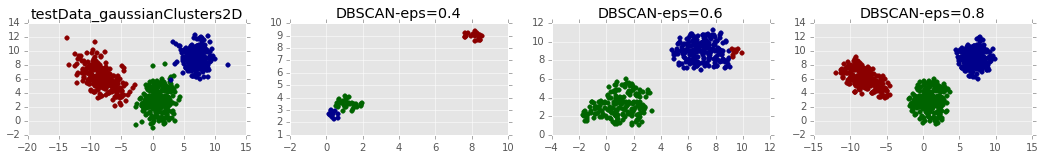

In [892]:
# testData_twospirals
fig = plt.figure(figsize=(18, 14))
test_paths = [testData_twospirals,testData_clusterincluster,testData_halfkernel,testData_gaussianClusters2D]

x0,y0,x1,y1,dataset,label = loaddata1(testData_twospirals)
ax = fig.add_subplot(6,4,1)
ax.scatter(x0, y0, color="DarkGreen")
ax.scatter(x1, y1, color="DarkBlue")
ax.set_title(str(name))
epslist = [2,2.3,3]
for ep in range(len(epslist)):
    db = DBSCAN(eps=epslist[ep], min_samples=10).fit(dataset)
    pre_label = db.labels_
    x0 = []; y0 = []; x1 = []; y1 = [];
    for data,t_label in zip(dataset,pre_label):  
        if t_label == 0:
            x0.append(data[0])
            y0.append(data[1])
        elif t_label == 1:
            x1.append(data[0])
            y1.append(data[1])         
    ax = fig.add_subplot(6,4,ep+2)
    ax.scatter(x0, y0, color="DarkGreen")
    ax.scatter(x1, y1, color="DarkBlue")
    ax.set_title("DBSCAN-eps="+str(epslist[ep]))

# testData_clusterincluster
fig = plt.figure(figsize=(18, 14))
x0,y0,x1,y1,dataset,label = loaddata1(testData_clusterincluster)
ax = fig.add_subplot(6,4,1)
ax.scatter(x0, y0, color="DarkGreen")
ax.scatter(x1, y1, color="DarkBlue")
ax.set_title(str(name))
epslist = [0.5,2,3]
for ep in range(len(epslist)):
    db = DBSCAN(eps=epslist[ep], min_samples=10).fit(dataset)
    pre_label = db.labels_
    x0 = []; y0 = []; x1 = []; y1 = [];
    for data,t_label in zip(dataset,pre_label):  
        if t_label == 0:
            x0.append(data[0])
            y0.append(data[1])
        elif t_label == 1:
            x1.append(data[0])
            y1.append(data[1])         
    ax = fig.add_subplot(6,4,ep+2)
    ax.scatter(x0, y0, color="DarkGreen")
    ax.scatter(x1, y1, color="DarkBlue")
    ax.set_title("DBSCAN-eps="+str(epslist[ep]))

# testData_halfkernel
fig = plt.figure(figsize=(18, 14))
x0,y0,x1,y1,dataset,label = loaddata1(testData_halfkernel)
ax = fig.add_subplot(6,4,1)
ax.scatter(x0, y0, color="DarkGreen")
ax.scatter(x1, y1, color="DarkBlue")
ax.set_title(str(name))
epslist = [2,3,4]
for ep in range(len(epslist)):
    db = DBSCAN(eps=epslist[ep], min_samples=10).fit(dataset)
    pre_label = db.labels_
    x0 = []; y0 = []; x1 = []; y1 = [];
    for data,t_label in zip(dataset,pre_label):  
        if t_label == 0:
            x0.append(data[0])
            y0.append(data[1])
        elif t_label == 1:
            x1.append(data[0])
            y1.append(data[1])         
    ax = fig.add_subplot(6,4,ep+2)
    ax.scatter(x0, y0, color="DarkGreen")
    ax.scatter(x1, y1, color="DarkBlue")
    ax.set_title("DBSCAN-eps="+str(epslist[ep]))

# testData_gaussianClusters2D
fig = plt.figure(figsize=(18, 14))
x1,y1,x2,y2,x3,y3,dataset,label = loaddata2(testData_gaussianClusters2D)
ax = fig.add_subplot(6,4,1)
ax.scatter(x1, y1, color="DarkGreen")
ax.scatter(x2, y2, color="DarkBlue")
ax.scatter(x3, y3, color="DarkRed")
ax.set_title(str(name))
epslist = [0.4,0.6,0.8]
for ep in range(len(epslist)):
    db = DBSCAN(eps=epslist[ep], min_samples=10).fit(dataset)
    pre_label = db.labels_
    x1 = []; y1 = []; x2 = []; y2 = []; x3 = []; y3 = [];   
    for data,t_label in zip(dataset,pre_label):  
        if t_label == 0:
            x1.append(data[0])
            y1.append(data[1])            
        elif t_label == 1:
            x2.append(data[0])
            y2.append(data[1])
        elif t_label == 2:
            x3.append(data[0])
            y3.append(data[1])
    ax = fig.add_subplot(6,4,ep+2)
    ax.scatter(x1, y1, color="DarkGreen")
    ax.scatter(x2, y2, color="DarkBlue")
    ax.scatter(x3, y3, color="DarkRed")
    ax.set_title("DBSCAN-eps="+str(epslist[ep]))

In [1070]:
list(set(pre_label))

[0, 1, 2, -1]

In [1088]:
fig = plt.figure(figsize=(18, 14))
ax.scatter(x, y)

In [1089]:
fig = plt.figure(figsize=(18, 14))
x0,y0,x1,y1,dataset,label = loaddata1(testData_twospirals)
epslist = [2,2.3,3]
db = DBSCAN(eps=2, min_samples=10).fit(dataset)
pre_label = db.labels_
color = 1
for a in list(set(pre_label)):
    x = []; y = [];
    for k,v in zip(dataset,pre_label):
        if v == a:  
            x.append(k[0])
            y.append(k[1])
    print type(x)
    print type(y)
    ax.scatter(x, y)

<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>
<type 'list'>


In [1068]:
set(pre_label)

{-1, 0, 1, 2}

# Bike Sharing Demand 
### 在kaggle中找到的dataset，用歷史租借腳踏車的資訊來去預測未來會有多少腳踏車被借走  
### 原始data的label是數值，因此轉成1-4離散，藉由四分位數

In [958]:
trainData = "/Users/wy/Desktop/MLfinalproject/train.csv"
def loadData(path):
    df = pd.read_csv(path)
    df = df.drop('datetime', axis=1)
    label = df['count'].as_matrix()
    dataset = df.drop('count', axis=1).as_matrix()
    percent25 = np.percentile(label, 25)
    percent50 = np.percentile(label, 50)
    percent75 = np.percentile(label, 75)
    discrete = []
    for l in label:
        if l <= percent25:
            discrete.append(1)
        elif percent25 < l <= percent50:
            discrete.append(2)
        elif percent50 < l <= percent75:
            discrete.append(3)
        else:
            discrete.append(4)
    label = np.array(discrete)
    return dataset,label

In [1052]:
df = pd.read_csv(trainData)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [1056]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [1094]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.lda import LDA

# 實驗  
### classifier： 1. SVM kernel = linear 2. SVM kernel = gaussian 3. decision tree 4. random forests
### dimension reduction ： 1. LDA 2. PCA
### normalization ： 1. Min-max 2. z-score
### 實驗1: 用各種classifier算出準確率，並且經過參數最佳化調整
### 實驗2: 應用實驗一個結果，取得最好的參數，比較normalization的差異
### 實驗3: 應用實驗1+實驗2為底，比較LDA,PCA分別降到哪個維度效果最好
### 綜合以上，得出各分類器最佳準確率

In [1059]:
# 實驗一
train_dataset,label = loadData(trainData)
X_train, X_test, y_train, y_test = train_test_split(train_dataset, label, test_size=.25)

# SVM kernel="linear"
scores = []
for c in range(1,21):
    clf = SVC(kernel="linear", C=0.025*c).fit(X_train, y_train)
    scores.append((clf.score(X_test, y_test),c))
print "SVM kernel=linear"
print "調整C 0.025*(1-20) - Penalty parameter C of the error term"
print sorted(scores, key=lambda tup: tup[0])[-1]
print "\n"

# SVM kernel="gamma"
scores = []
for p in range(1,9):
    p = float(p)/8.
    clf = SVC(gamma=p, C=p).fit(X_train, y_train)
    scores.append((clf.score(X_test, y_test),p))
print "SVM kernel=gaussian"
print "調整0.125-1 - Penalty parameter C of the error term 和 gamma "
print sorted(scores, key=lambda tup: tup[0])[-1]
print "\n"

# RandomForestClassifier
scores = []
for n in range(5,35,5):
    clf = RandomForestClassifier(max_depth=5, n_estimators=n, max_features=1).fit(X_train, y_train)
    scores.append((clf.score(X_test, y_test),n))
print "RandomForestClassifier"
print "調整樹的數量 5,10,15,20,25,30"
print sorted(scores, key=lambda tup: tup[0])[-1]
print "\n"

# DecisionTreeClassifier
scores = []
for p in ['entropy','gini']:
    clf = tree.DecisionTreeClassifier(criterion = p ).fit(X_train, y_train)
    scores.append((clf.score(X_test, y_test),p))
print "DecisionTreeClassifier"
print "information gain的方式 entropy or gini"
print sorted(scores, key=lambda tup: tup[0])[-1]
print "\n"

SVM kernel=linear
調整C 0.025*(1-20) - Penalty parameter C of the error term
(0.9996326230712711, 15)


SVM kernel=gaussian
調整0.125-1 - Penalty parameter C of the error term 和 gamma 
(0.27222630418809701, 1.0)


RandomForestClassifier
調整樹的數量 5,10,15,20,25,30
(0.86407053637031594, 20)


DecisionTreeClassifier
information gain的方式 entropy or gini
(0.98750918442321822, 'entropy')




In [1090]:
# 實驗二
train_dataset,label = loadData(trainData)
Standard_train_dataset = StandardScaler().fit_transform(train_dataset)
MinMax_train_dataset = MinMaxScaler().fit_transform(train_dataset)
datasets = [train_dataset,Standard_train_dataset,MinMax_train_dataset]
nor_names = ["正常","min-max","z-score"]
clfs = [
       SVC(kernel="linear", C=0.025*19),
       SVC(gamma=0.25, C=0.25),
       tree.DecisionTreeClassifier(criterion = 'entropy' ),
       RandomForestClassifier(max_depth=5, n_estimators=25, max_features=1),
      ]
names = ["SVM kernel=linear","SVM kernel=gaussian","DecisionTree","RandomForest"]
for name,c in zip(names,clfs):
    print name
    for dataset,nor_name in zip(datasets,nor_names):
        X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=.25)
        clf = c.fit(X_train, y_train)
        print nor_name
        print clf.score(X_test, y_test)

SVM kernel=linear
正常
1.0
min-max
0.988978692138
z-score
0.948199853049
SVM kernel=gaussian
正常
0.242468772961
min-max
0.911462160176
z-score
0.871418074945
DecisionTree
正常
0.988978692138
min-max
0.989713445996
z-score
0.987509184423
RandomForest
正常
0.862968405584
min-max
0.841293166789
z-score
0.85268185158


In [1097]:
# 實驗三 - PCA
clfs = [
       SVC(kernel="linear", C=0.025*19),
       SVC(gamma=0.25, C=0.25),
       tree.DecisionTreeClassifier(criterion = 'entropy' ),
       RandomForestClassifier(max_depth=5, n_estimators=25, max_features=1),
      ]
names = ["SVM kernel=linear","SVM kernel=gaussian","DecisionTree","RandomForest"]
train_dataset,label = loadData(trainData)
train_dataset = MinMaxScaler().fit_transform(train_dataset)
X_train, X_test, y_train, y_test = train_test_split(train_dataset, label, test_size=.25)
print "PCA"
print "\n"
for name,c in zip(names,clfs):
    print name
    scores = []
    for n in range(5,11):
        pca = PCA(n_components=n)
        pca_test_dataset = pca.fit(X_train).transform(X_test)
        pca_train_dataset = pca.fit(X_train).transform(X_train)
        clf = c.fit(pca_train_dataset, y_train)
        scores.append((clf.score(pca_test_dataset, y_test),n))
    print sorted(scores, key=lambda tup: tup[0])[-1]
    print "--"
    
# 實驗三 - LDA
clfs = [
       SVC(kernel="linear", C=0.025*19),
       SVC(gamma=0.25, C=0.25),
       tree.DecisionTreeClassifier(criterion = 'entropy' ),
       RandomForestClassifier(max_depth=5, n_estimators=25, max_features=1),
      ]
names = ["SVM kernel=linear","SVM","DecisionTree","RandomForest"]
train_dataset,label = loadData(trainData)
train_dataset = MinMaxScaler().fit_transform(train_dataset)
X_train, X_test, y_train, y_test = train_test_split(train_dataset, label, test_size=.25)
print "LDA"
print "\n"
for name,c in zip(names,clfs):
    print name
    scores = []
    for n in range(5,11):
        lda = LDA(n_components=n)
        lda_train_dataset = lda.fit(X_train, y_train).transform(X_train)
        lda_test_dataset = lda.fit(X_train, y_train).transform(X_test)
        clf = c.fit(lda_train_dataset, y_train)
        scores.append((clf.score(lda_test_dataset, y_test),n))
    print sorted(scores, key=lambda tup: tup[0])[-1]
    print "--"

PCA


SVM kernel=linear
(0.94966936076414399, 9)
--
SVM kernel=gaussian
(0.86811168258633353, 8)
--
DecisionTree
(0.79904481998530497, 8)
--
RandomForest
(0.67413666421748719, 7)
--
LDA


SVM kernel=linear
(0.96326230712711247, 10)
--
SVM
(0.95775165319617928, 10)
--
DecisionTree
(0.95628214548126378, 8)
--
RandomForest
(0.95077149155033069, 7)
--
